In [1]:
from functions import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline
import matplotlib.style as mplstyle
mplstyle.use(['ggplot', 'fast'])

# plt.rcParams.update({
#     "text.usetex": True,       
#     "font.family": "serif",    
#     "font.size": 10, 
# })

np.random.seed(2018)

In [2]:
polynomial_degree     = 10
n = 1000
lambda_               = 1e-5

learning_rate = 0.01
n_iterations  = 10000
tolerance     = 1e-6
use_tol       = True

train, test, full = make_data(n, 2018)

X_train = train[0].reshape(-1,1)
X_test = test[0].reshape(-1,1)
y_train = train[1]
y_test = test[1]

#scaler = StandardScaler()
#scaler.fit(X_train)
#x_train_scaled = scaler.transform(X_train)
#x_test_scaled  = scaler.transform(X_test)

poly = PolynomialFeatures(degree=polynomial_degree, include_bias=False)
X_train = poly.fit_transform(X_train)#_scaled)
X_test = poly.transform(X_test)


In [3]:
def gradient_descent_lasso(X, y, lmbd, learning_rate=0.0001, n_iterations=1000, tol=1e-6, use_tol=False):
    n_samples, n_features = X.shape
    theta = np.zeros(n_features)
    cost_history = []
    for i in range(n_iterations):
        gradient = lasso_gradient(X, y, theta,lmbd)
        theta -= learning_rate * gradient
        # cost is the Lasso cost function, including the regularization term
        cost = (1/n_samples) * np.sum((X @ theta - y)**2) + lmbd * np.sum(np.abs(theta))
        cost_history.append(cost)
        if use_tol and i > 0 and abs(cost_history[-2] - cost) < tol:
            print(f"Converged after {i} iterations.")
            break
    return theta, cost_history

In [4]:
theta_lasso_gd, lasso_cost_hist = gradient_descent_lasso(X_train,y_train,0.1,n_iterations = 100000)


In [5]:
y_pred_gd_lasso = X_test @ theta_lasso_gd
mse_gd_lasso    = MSE(y_test, y_pred_gd_lasso)
r2_gd_lasso     = R2(y_test, y_pred_gd_lasso)

Text(0.5, 1.0, 'LASSO ')

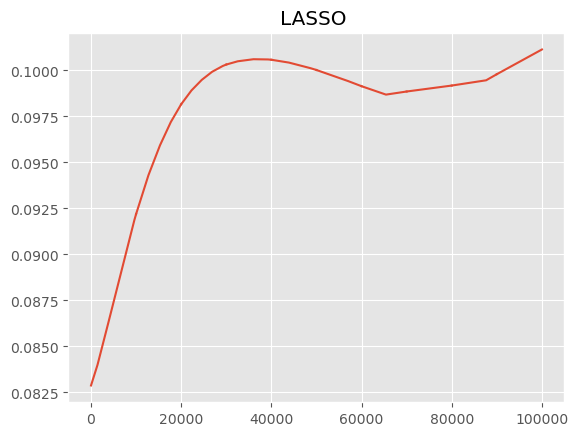

In [6]:
plt.plot(lasso_cost_hist)
plt.title("LASSO ")

In [7]:
sdg_ols, cost_ols = stochastic_gradient_descent_advanced(X_train, y_train, method='gd', lr_method='ols', learning_rate=0.001, n_iterations=100000, tol=1e-6, use_tol=False, beta=0.9, epsilon=1e-8, lambda_=0.01)
sdg_ridge, cost_ridge = stochastic_gradient_descent_advanced(X_train, y_train, method='gd', lr_method='ridge', learning_rate=0.001, n_iterations=100000, tol=1e-6, use_tol=False, beta=0.9, epsilon=1e-8, lambda_=0.01)
sdg_lasso, cost_lasso = stochastic_gradient_descent_advanced(X_train, y_train, method='gd', lr_method='lasso', learning_rate=0.001, n_iterations=100000, tol=1e-6, use_tol=False, beta=0.9, epsilon=1e-8, lambda_=0.01)
sdg_ols_adam, cost_ols_adam = stochastic_gradient_descent_advanced(X_train, y_train, method='adam', lr_method='ols', learning_rate=0.001, n_iterations=100000, tol=1e-6, use_tol=False, beta=0.9, epsilon=1e-8, lambda_=0.01)
sdg_ridge_adam, cost_ridge_adam = stochastic_gradient_descent_advanced(X_train, y_train, method='adam', lr_method='ridge', learning_rate=0.001, n_iterations=100000, tol=1e-6, use_tol=False, beta=0.9, epsilon=1e-8, lambda_=0.01)
sdg_lasso_adam, cost_lasso_adam = stochastic_gradient_descent_advanced(X_train, y_train, method='adam', lr_method='lasso', learning_rate=0.001, n_iterations=100000, tol=1e-6, use_tol=False, beta=0.9, epsilon=1e-8, lambda_=0.01)



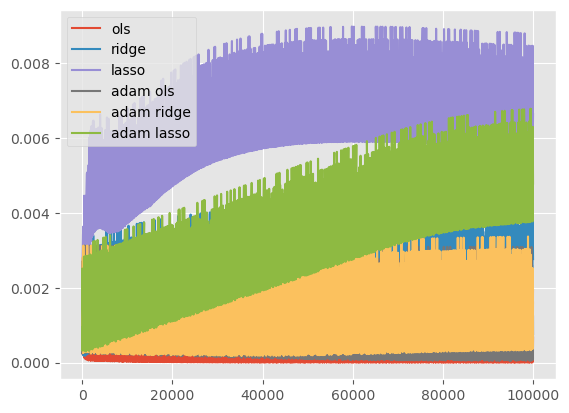

In [8]:
plt.plot(cost_ols, label = "ols")
plt.plot(cost_ridge, label = "ridge")
plt.plot(cost_lasso, label = "lasso")
plt.plot(cost_ols_adam, label = "adam ols")
plt.plot(cost_ridge_adam, label = "adam ridge")
plt.plot(cost_lasso_adam, label = "adam lasso")
plt.legend()



In [9]:
y_pred_ols = X_test @ sdg_ols
y_pred_ridge = X_test @ sdg_ridge
y_pred_lasso = X_test @ sdg_lasso
y_pred_ols_adam = X_test @ sdg_ols_adam
y_pred_ridge_adam = X_test @ sdg_ridge_adam
y_pred_lasso_adam = X_test @ sdg_lasso_adam

ols_mse = MSE(y_pred_ols,y_test)
ols_adam_mse = MSE(y_pred_ols_adam,y_test)
ridge_mse = MSE(y_pred_ridge,y_test)
ridge_adam_mse = MSE(y_pred_ridge_adam,y_test)
lasso_mse = MSE(y_pred_lasso,y_test)
lasso_adam_mse = MSE(y_pred_lasso_adam,y_test)

mses = [ols_mse, ols_adam_mse, ridge_mse, ridge_adam_mse, lasso_mse,lasso_adam_mse]

for i in mses:
    print(i)

0.052816289881783475
0.05689068675118013
0.05298994781023742
0.05685516945817465
0.05287462655222791
0.05685481772031938


In [10]:
gd_ols, cost_gd_ols = gradient_descent_advanced(X_train, y_train, method='gd', lr_method='ols', learning_rate=0.01, n_iterations=100000, tol=1e-6, use_tol=False, beta=0.9, epsilon=1e-8, lambda_=0.01)

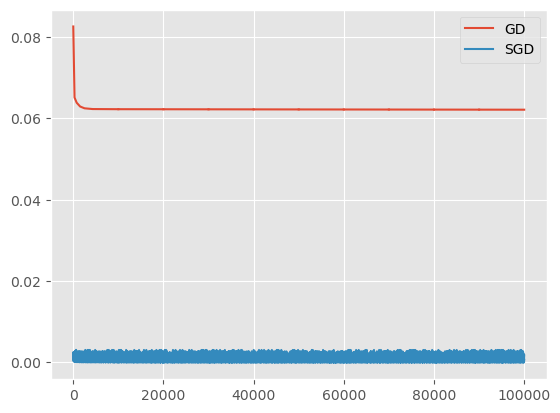

In [12]:
plt.plot(cost_gd_ols, label= "GD")
plt.plot(cost_ols,label="SGD")
plt.legend()